In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

importing libraries and loading the dataset 'Walmart'

In [2]:
df = pd.read_csv('Walmart.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# EDA

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df['Date'] =  pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [7]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [8]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
correlation=df.corr(numeric_only=True)
correlation

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [11]:
summary_stats = correlation.describe()
summary_stats

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,7.000000e+00,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,1.022959e-01,0.066915,1.160359e-01,0.168781,0.132971,0.059991,0.127539
std,4.353477e-01,0.428792,3.952693e-01,0.385524,0.395264,0.442643,0.418360
min,-3.353320e-01,-0.335332,-1.550913e-01,-0.155091,-0.170642,-0.302020,-0.302020
25%,-1.160755e-01,-0.089405,-4.025430e-02,-0.043235,-0.056515,-0.190067,-0.070430
50%,-4.386841e-16,-0.063810,-4.386841e-16,0.101158,0.009464,-0.072634,0.010960
75%,1.417771e-01,0.023177,2.392563e-02,0.160935,0.102502,0.087363,0.162345
max,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000


In [12]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [13]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


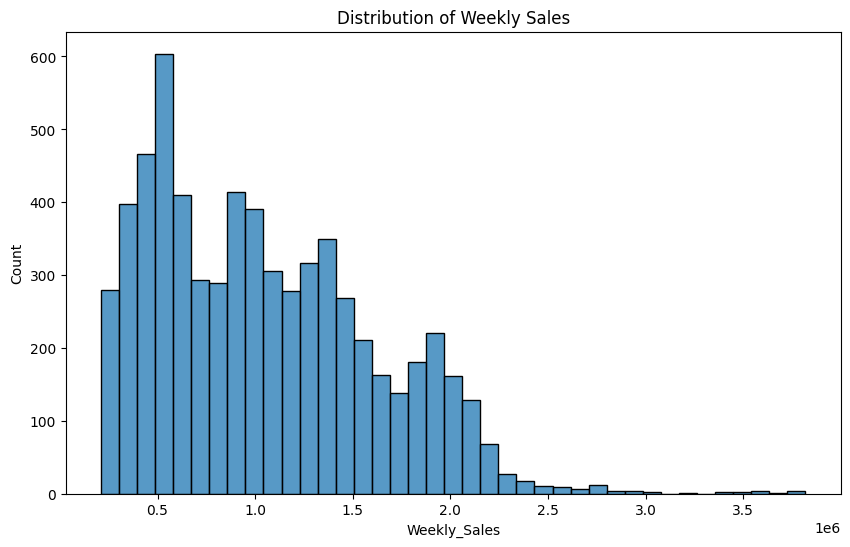

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['Weekly_Sales'])
plt.title('Distribution of Weekly Sales')
plt.show()

<Axes: >

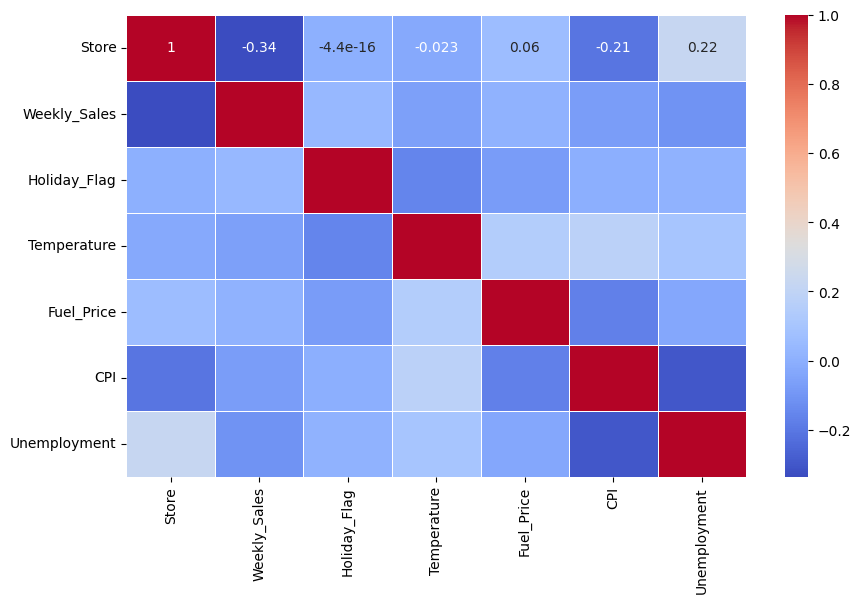

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True, cmap='coolwarm', linewidths=0.5)

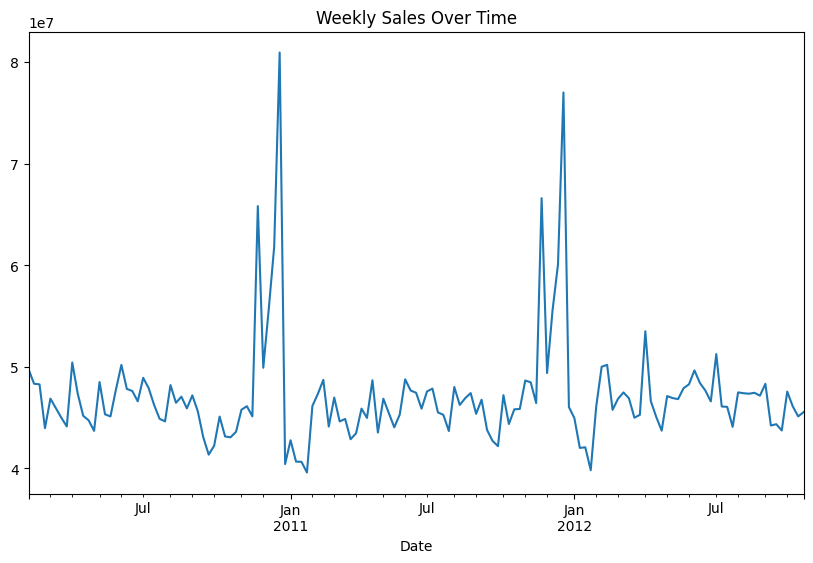

In [16]:
plt.figure(figsize=(10,6))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Weekly Sales Over Time')
plt.show()

In [17]:
import pandas as pd

Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]

print('lower_bound :', lower_bound)
print('upper_bound :', upper_bound)

print("Outliers detected:")
outliers

lower_bound : -746862.7275
upper_bound : 2720371.4924999997
Outliers detected:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163,24,12,2010
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441,23,12,2011
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127,26,11,2010
474,4,2010-12-17,2740057.14,0,46.57,2.884,126.879484,7.127,17,12,2010
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127,24,12,2010
523,4,2011-11-25,3004702.33,1,47.96,3.225,129.836400,5.143,25,11,2011
526,4,2011-12-16,2771397.17,0,36.44,3.149,129.898065,5.143,16,12,2011
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143,23,12,2011
761,6,2010-12-24,2727575.18,0,55.07,2.886,212.916508,7.007,24,12,2010
1329,10,2010-11-26,2939946.38,1,55.33,3.162,126.669267,9.003,26,11,2010


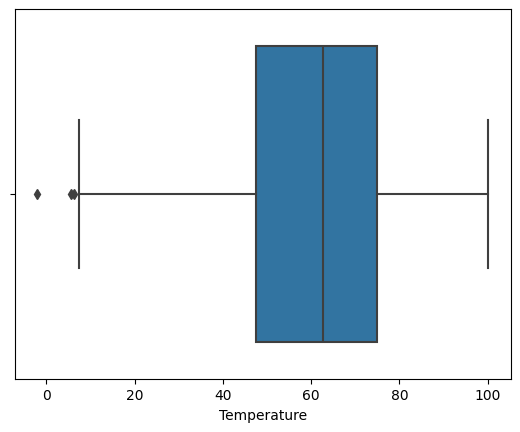

In [18]:
sns.boxplot(x=df['Temperature'])
plt.show()

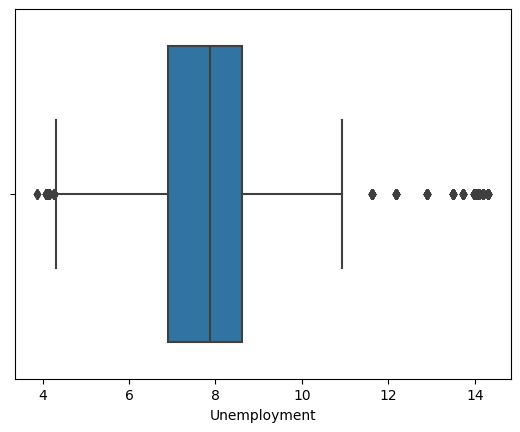

In [19]:
sns.boxplot(x=df['Unemployment'])
plt.show()

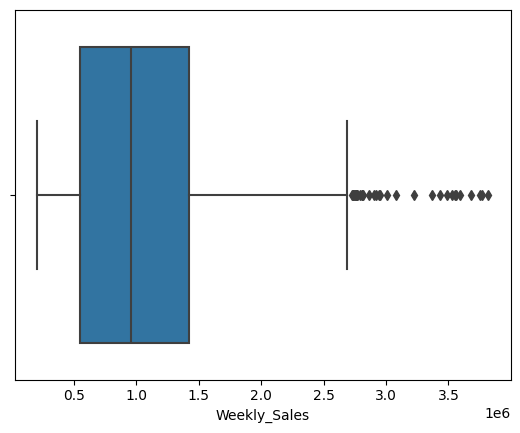

In [20]:
sns.boxplot(x=df['Weekly_Sales'])
plt.show()

# 1.If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

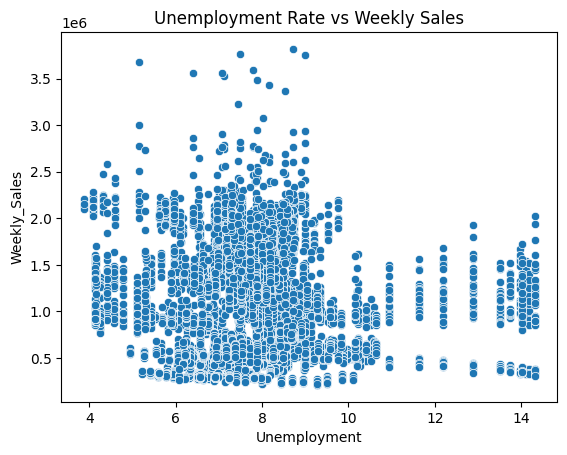

Correlation between Unemployment and Weekly Sales: -0.10617608965795418


In [21]:
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')
plt.title('Unemployment Rate vs Weekly Sales')
plt.show()

correlation = df['Unemployment'].corr(df['Weekly_Sales'])
print(f"Correlation between Unemployment and Weekly Sales: {correlation}")


A correlation of -0.106 indicates a very weak negative relationship,higher unemployment can lead to reduced consumer spending, as people might have less income to spend.

In [22]:
store_correlations = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment'])).reset_index(name='Sales_Unemployment_Corr')

# Sort by the correlation, and select the store with the strongest negative correlation
most_affected_store = store_correlations.sort_values(by='Sales_Unemployment_Corr').head(1)

# Print the store that is suffering the most
print("Store suffering the most due to unemployment impact is:" )
most_affected_store

Store suffering the most due to unemployment impact is:


,Store,Sales_Unemployment_Corr
37,38,-0.78529


# 2. If the weekly sales show a seasonal trend, when and what could be the reason?

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

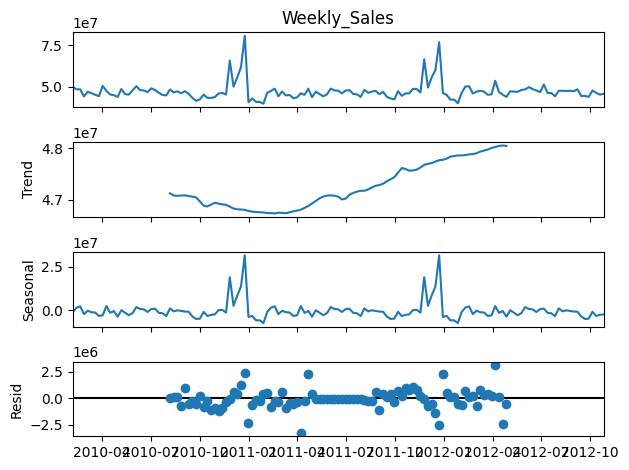

In [24]:
store_sales = df.groupby(['Date'])['Weekly_Sales'].sum()
result = seasonal_decompose(store_sales, model='additive', period=52)

result.plot()
plt.show()


In [25]:
weekly_sales_count_per_month = df.groupby('Month')['Weekly_Sales'].count()

print("Number of weekly sales entries per month:")
weekly_sales_count_per_month

Number of weekly sales entries per month:


Month
1     360
2     540
3     585
4     630
5     540
6     585
7     630
8     585
9     585
10    585
11    360
12    450
Name: Weekly_Sales, dtype: int64

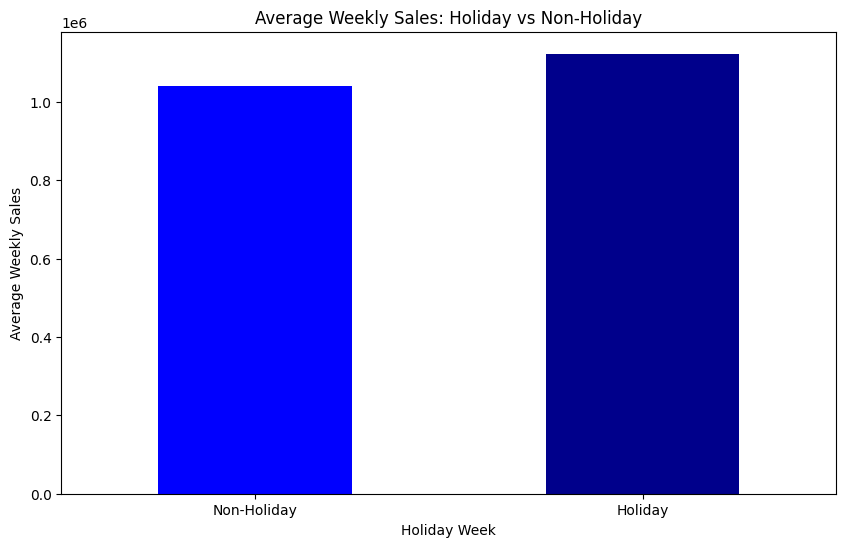

Average Weekly Sales on Non-Holidays: 1041256.3802088555
Average Weekly Sales on Holidays: 1122887.8923555557


In [26]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

plt.figure(figsize=(10, 6))
ax = holiday_sales.plot(kind='bar', color=['blue', 'darkblue'], legend=False)


plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday Week')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

print("Average Weekly Sales on Non-Holidays:", holiday_sales[0])
print("Average Weekly Sales on Holidays:", holiday_sales[1])

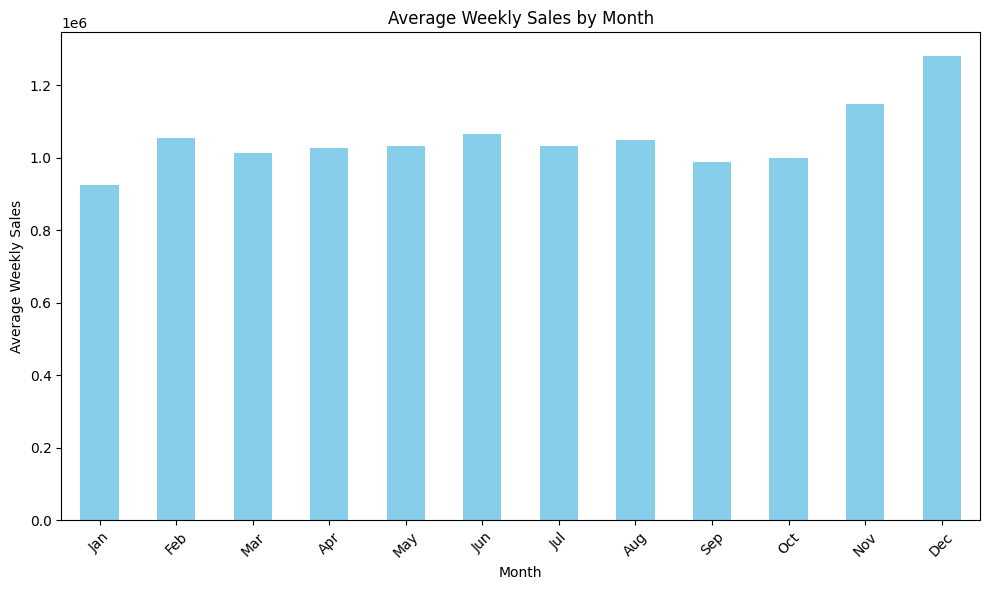

In [27]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue', legend=False)

plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()


In [28]:
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

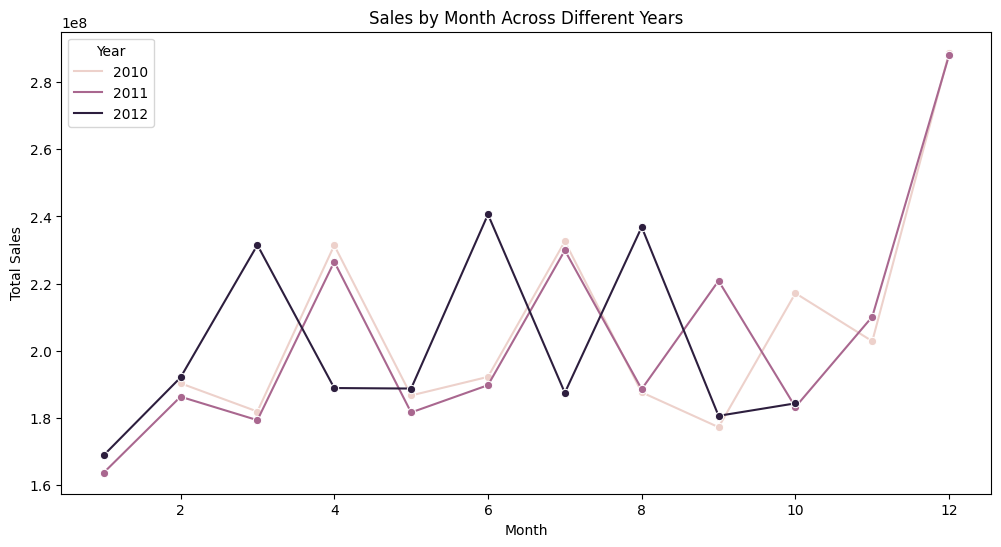

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.title('Sales by Month Across Different Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [30]:
december_data = df[df['Month'] == 12]
december_holidays = december_data[december_data['Holiday_Flag'] == 1]
december_non_holidays = december_data[december_data['Holiday_Flag'] == 0]

december_fuel_price = december_data['Fuel_Price'].mean()
december_cpi = december_data['CPI'].mean()

print("Average Fuel Price in December:", december_fuel_price)
print("Average CPI in December:", december_cpi)

december_temp = december_data['Temperature'].mean()
print("Average Temperature in December:", december_temp)

Average Fuel Price in December: 3.159311111111111
Average CPI in December: 171.10456151355555
Average Temperature in December: 40.18024444444445


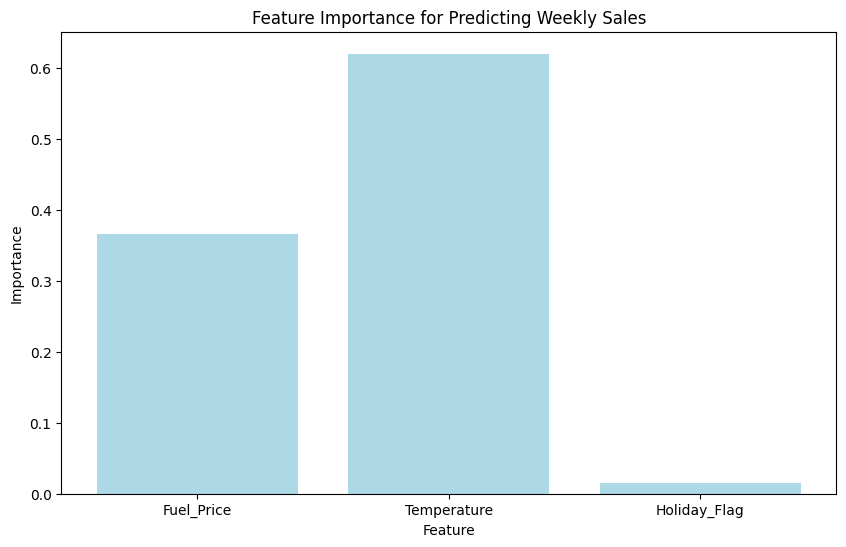

In [31]:
X = df[['Fuel_Price', 'Temperature', 'Holiday_Flag']]
y = df['Weekly_Sales']

# Fit the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(features, importances, color='lightblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Predicting Weekly Sales')
plt.show()


The sales can be affected due to the number of holidays,temperature of a particuar month and Fuel prices
As seen in the above graphs the sales is high in the 12th month

# 3.Does temperature affect the weekly sales in any manner?

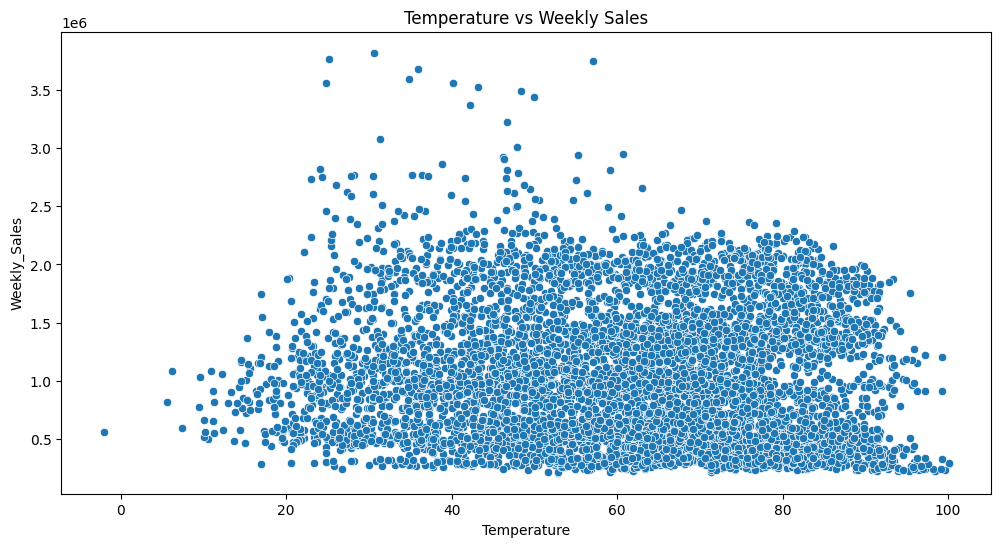

Correlation between Temperature and Weekly Sales: -0.06381001317946954


In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs Weekly Sales')
plt.show()

correlation_temp = df['Temperature'].corr(df['Weekly_Sales'])
print(f"Correlation between Temperature and Weekly Sales: {correlation_temp}")

The negative sign (-0.0638) suggests that as temperature increases, weekly sales tend to decrease. However, This relationship is very weak.

4. How is the Consumer Price index affecting the weekly sales of various stores?

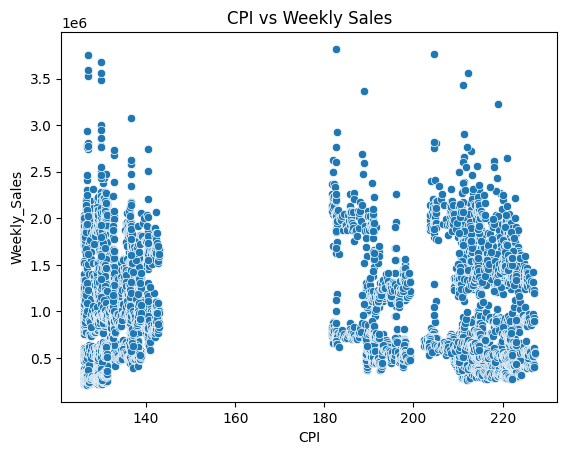

Correlation between CPI and Weekly Sales: -0.0726341620401762


In [33]:
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title('CPI vs Weekly Sales')
plt.show()

correlation_cpi = df['CPI'].corr(df['Weekly_Sales'])
print(f"Correlation between CPI and Weekly Sales: {correlation_cpi}")


Based on the correlation coefficient, there's little evidence to suggest that the CPI is a significant predictor of weekly sales in this dataset. Other factors are likely more influential in determining sales performance.

5.Top performing stores according to the historical data. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [34]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

print("Top performing stores:")
print(store_sales.head(1))

print("\nWorst performing store:")
print(store_sales.tail(1))

difference = store_sales.max() - store_sales.min()
print(f"\nDifference between highest and lowest performing store: {difference}")

Top performing stores:
Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

Worst performing store:
Store
33    37160221.96
Name: Weekly_Sales, dtype: float64

Difference between highest and lowest performing store: 264237570.49999997


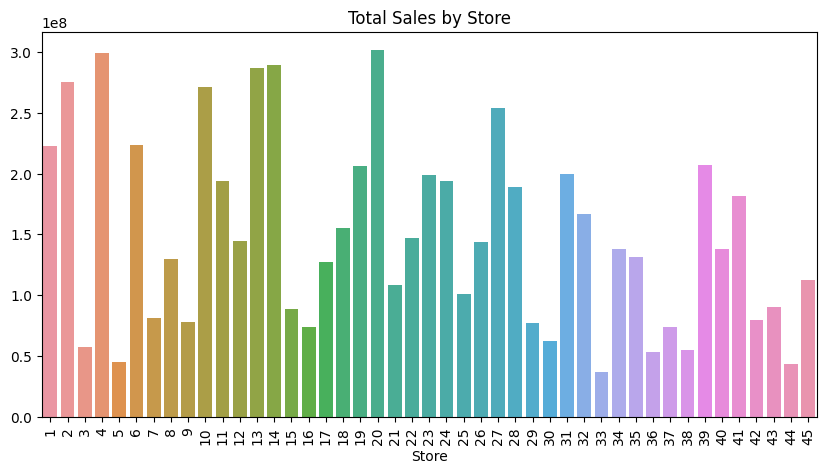

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.title('Total Sales by Store')
plt.xticks(rotation=90)
plt.show()


# Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df[['Fuel_Price', 'Temperature', 'CPI', 'Unemployment', 'Holiday_Flag']]
y = df['Weekly_Sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_lin}")
print(f"Mean Absolute Error (MAE): {mae_lin}")
print(f"R-squared (R²): {r2_lin}")


Linear Regression Results:
Mean Squared Error (MSE): 316554511405.115
Mean Absolute Error (MAE): 475432.53295882524
R-squared (R²): 0.01738312550370069


In [37]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R²): {r2_rf}")


Random Forest Regression Results:
Mean Squared Error (MSE): 287251204193.4476
Mean Absolute Error (MAE): 383262.14035348577
R-squared (R²): 0.1083435228675661


Since the MSE of Random forest regressor is lesser than the linear regression model we use random forest regressor

In [38]:
from datetime import timedelta

df = df.sort_values(by='Date')


X = df[['Store', 'Fuel_Price', 'Temperature', 'CPI', 'Unemployment', 'Holiday_Flag']]
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

rf_reg.fit(X_train, y_train)

stores = list(range(1, 46))

last_date = df['Date'].max()
future_dates = [last_date + timedelta(weeks=i) for i in range(1, 13)]

future_data_list = []
for store in stores:
    forecast_store_data = pd.DataFrame({
        'Date': future_dates,
        'Store': store,
        'Fuel_Price': X['Fuel_Price'].mean(),      
        'Temperature': X['Temperature'].mean(),     
        'CPI': X['CPI'].mean(),                     
        'Unemployment': X['Unemployment'].mean(),   
        'Holiday_Flag': 0                           
    })
    future_data_list.append(forecast_store_data)

forecast_data = pd.concat(future_data_list, ignore_index=True)

X_forecast = forecast_data[['Store', 'Fuel_Price', 'Temperature', 'CPI', 'Unemployment', 'Holiday_Flag']]

forecast_data['Predicted_Weekly_Sales'] = rf_reg.predict(X_forecast)

forecast_results = forecast_data[['Date', 'Store', 'Predicted_Weekly_Sales']]

print(forecast_results)


          Date  Store  Predicted_Weekly_Sales
0   2012-11-02      1            1.982757e+06
1   2012-11-09      1            1.982757e+06
2   2012-11-16      1            1.982757e+06
3   2012-11-23      1            1.982757e+06
4   2012-11-30      1            1.982757e+06
..         ...    ...                     ...
535 2012-12-21     45            1.155998e+06
536 2012-12-28     45            1.155998e+06
537 2013-01-04     45            1.155998e+06
538 2013-01-11     45            1.155998e+06
539 2013-01-18     45            1.155998e+06

[540 rows x 3 columns]
